# **Importing** **libraries** 

In [ ]:
import mne
import pymatreader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Seizure file**

In [104]:
data = ('/content/chb03_s.set')

In [105]:
raw = mne.io.read_raw_eeglab(data)

Reading /content/chb03_s.fdt


<ipython-input-105-9719ed378c79>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_eeglab(data)
<ipython-input-105-9719ed378c79>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne.io.read_raw_eeglab(data)
<ipython-input-105-9719ed378c79>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(data)


In [106]:
raw.load_data()

Reading 0 ... 10240  =      0.000 ...    40.000 secs...


<RawEEGLAB | chb03_s.fdt, 23 x 10241 (40.0 s), ~1.8 MB, data loaded>

Opening raw-browser...


<function matplotlib.pyplot.close>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


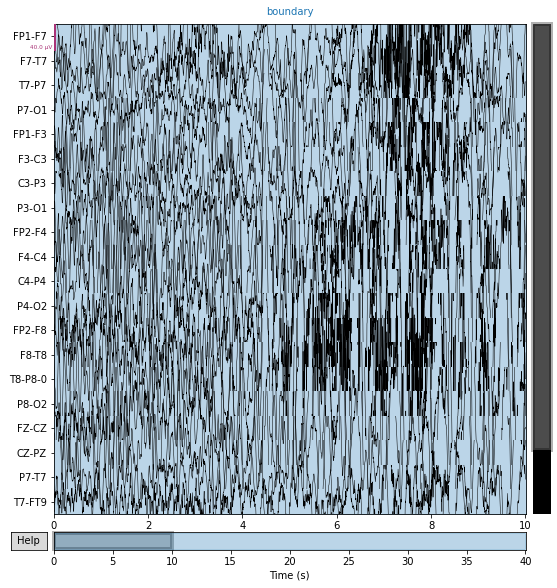

In [109]:
raw.plot()
plt.close

# **Creating Epochs**

In [110]:
epochs = mne.make_fixed_length_epochs(raw , duration = 10)

Not setting metadata
4 matching events found
No baseline correction applied
0 projection items activated


In [111]:
array = epochs.get_data()
print('array shape is', array.shape)

Using data from preloaded Raw for 4 events and 2560 original time points ...
0 bad epochs dropped
array shape is (4, 23, 2560)


# **Making Epoch DataFrame**

In [112]:
df = pd.DataFrame.from_records(array)

df.columns = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
              'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
              'T8-P8', 'P8-O2' , 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
              'FT10-T8', 'T8-P8']


df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0,"[5.724053573608398e-05, 5.3333332061767574e-05...","[4.59096450805664e-05, 5.098900985717773e-05, ...","[5.5677654266357416e-05, 5.64590950012207e-05,...","[3.3211233615875243e-06, 2.539682626724243e-06...","[-2.1684982299804687e-05, -1.9731380462646483e...","[4.239316177368164e-05, 4.5518924713134766e-05...","[8.459096527099608e-05, 8.888888549804687e-05,...","[5.763125610351562e-05, 5.020756912231445e-05,...","[1.0354090690612793e-05, 2.5592185974121094e-0...","[2.9499389648437498e-05, 2.5201465606689453e-0...",...,"[4.5518924713134766e-05, 3.926739883422852e-05...","[3.2625152587890626e-05, 2.1294261932373045e-0...","[-5.724053573608398e-05, -5.1379730224609374e-...","[4.2783882141113276e-05, 3.575091552734375e-05...","[0.0001138949966430664, 0.00011467643737792969...","[-5.528693389892578e-05, -5.606837463378906e-0...","[1.8949939727783203e-05, 1.582417583465576e-05...","[2.481074523925781e-05, 3.692307662963867e-05,...","[6.446886539459228e-06, 9.18192958831787e-06, ...","[3.2625152587890626e-05, 2.1294261932373045e-0..."
1,"[2.0512821197509766e-05, 3.8485958099365234e-0...","[-3.301587295532226e-05, -3.2234432220458985e-...","[-6.075701904296875e-05, -6.231990051269531e-0...","[-1.4652014732360839e-05, -9.18192958831787e-0...","[-2.6373626708984374e-05, 4.102564334869384e-0...","[-9.768009781837463e-07, 4.8840050697326655e-0...","[-1.6214897155761717e-05, -2.0122100830078124e...","[-4.434676361083984e-05, -5.64590950012207e-05...","[-0.00010412698364257811, -6.544566345214844e-...","[9.670330047607421e-05, 8.84981689453125e-05, ...",...,"[-3.8876678466796875e-05, -3.8876678466796875e...","[-3.8485958099365234e-05, -8.791209220886231e-...","[0.00014124542236328125, 0.0001674236907958984...","[0.00010998779296874999, 0.0001236630020141601...","[4.0439559936523434e-05, 4.0830280303955076e-0...","[6.114773941040038e-05, 6.271062088012695e-05,...","[4.356532287597656e-05, 3.536019515991211e-05,...","[-0.00020454212951660157, -0.00024283271789550...","[-5.9584857940673824e-05, -5.724053573608398e-...","[-3.8485958099365234e-05, -8.791209220886231e-..."
2,"[0.00012913308715820312, 0.000134993896484375,...","[4.2783882141113276e-05, 4.161172103881836e-05...","[4.122100067138672e-05, 4.5128204345703125e-05...","[0.00010842491149902343, 0.0001123321151733398...","[0.00014593406677246092, 0.0001642979278564453...","[0.00014905982971191405, 0.0001353846130371093...","[5.1770450592041015e-05, 5.528693389892578e-05...","[-2.2857143402099607e-05, -1.934066009521484e-...","[6.778998565673827e-05, 0.0001768009796142578,...","[4.434676361083984e-05, 9.963370323181152e-06,...",...,"[1.0354090690612793e-05, -2.1684982299804687e-...","[0.00010061050415039062, 9.943833923339843e-05...","[0.00013772894287109375, 0.0001467154998779297...","[0.00010295482635498046, 8.263735961914062e-05...","[0.00010178266143798828, 0.0001029548263549804...","[-4.0830280303955076e-05, -4.473748397827148e-...","[-4.0439559936523434e-05, -4.5128204345703125e...","[4.473748397827148e-05, 6.857142639160156e-05,...","[4.122100067138672e-05, 2.2075702667236328e-05...","[0.00010061050415039062, 9.943833923339843e-05..."
3,"[0.00010803418731689453, 0.0001291330871582031...","[0.00016586080932617188, 0.0001646886444091796...","[6.8376069068908684e-06, 1.7582417726516723e-0...","[-9.474969482421875e-05, -9.514041137695312e-0...","[-4.239316177368164e-05, -1.816849899291992e-0...","[0.00011819291687011718, 0.0001095970687866211...","[0.00010568986511230468, 0.0001049084243774414...","[2.9304029941558837e-06, 2.9304029941558837e-0...","[-0.00010451770782470703, -0.00011975579833984...","[0.00030769232177734374, 0.0002967521362304687...",...,"[0.00038583639526367186, 0.0003897435913085937...","[4.864468765258789e-05, 3.301587295532226e-05,...","[-9.435897064208984e-05, -0.000101782661437988...","[0.00018617826843261718, 0.000178363861083984